# Case Study: Fast Food

For this case study, the objective is to conduct market segmentation analysis using a dataset originally collected to assess the validity of various survey answer formats in brand image research. The data is described in prior studies by Dolnicar and others. In this scenario, we will assume the role of McDonald's and aim to identify distinct consumer segments with varying perceptions of the brand. This analysis will help us determine which market segments to prioritize and what messages to convey.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product


# Step 2: Specifying the Ideal Target Segment

## Knock_out criteria
* Homogenous
* Distinct
* Matching the strength's of McDonald's
* Identifiable
* Reacheable

## Attractivenss criteria
* Positive perception of McDonald's
* Frequently eats out
* Likes fast food
* Wish to learn more about market segments which are currently not fond of McDonald's 

In [3]:
data = pd.read_csv("data/mcdonalds.csv")

In [4]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


# Step 4: Exploring Data

In [6]:
def lencoder(col):
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    return data[col]

In [7]:
for col in data.columns[:11]:
    data[col] = lencoder(col)

In [8]:
data[data.columns[:11]].mean()

yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
dtype: float64

* The average values of the transformed binary numeric segmentation variables indicate that about half of the respondents (55%) perceive McDonald's as YUMMY, 91% believe that eating at McDonald's is CONVENIENT, but only 9% think that McDonald's food is SPICY 

In [9]:
# Principal Component Analysis
pca = PCA(random_state = 42)

In [10]:
pca.fit(data[data.columns[:11]])

PCA(random_state=42)

In [11]:
data_pca = pca.transform(data[data.columns[:11]])

In [12]:
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [13]:
pca.explained_variance_ratio_.cumsum()

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [14]:
df_pca = pd.DataFrame(data_pca, columns = [f'PC{x}' for x in range(1, 12)])

In [15]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245


In [16]:
pca_summary = pd.DataFrame({'Standard Deviation':df_pca.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})

In [17]:
pca_summary

,Standard Deviation,Proportion of Variance,Cumultive Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


 From Principal Components Analysis indicate that the first two components capture about 50% of the information contained in the segmentation variables.

In [18]:
# Factor Loadings
factor_loadings = pd.DataFrame(pca.components_, columns = data.columns[:11], index = df_pca.columns).T

In [19]:
factor_loadings.style.background_gradient(cmap = 'Blues')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069
healthy,-0.213711,0.076593,0.192051,0.763488,0.287846,-0.178226,-0.349616,0.176303,-0.185572,-0.038117,0.157608


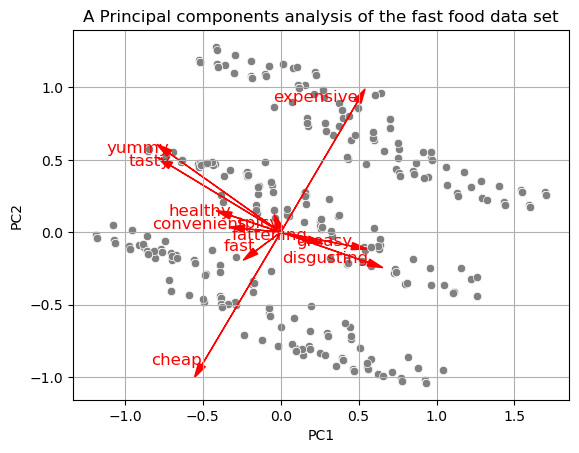

In [20]:
# Calculate centroid
index_names = factor_loadings.index

# Plot data points
sns.scatterplot(df_pca, x = 'PC1', y = 'PC2', color = 'grey')

# Plot arrows from centroid to provided coordinates with index names
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 1.5, factor_loadings['PC2'][i] * 1.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text(factor_loadings['PC1'][i] * 1.5, factor_loadings['PC2'][i]* 1.5, index_names[i], fontsize=12, ha='right', color = 'red')

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('A Principal components analysis of the fast food data set')
plt.grid(True)
plt.show()

# Step 5: Extracting Segments

In [21]:
data_km28 = [KMeans(n_clusters = k, random_state = 42).fit(data[data.columns[:11]]) for k in range(2, 9)]

In [22]:
wcss = [model.inertia_ for model in data_km28]

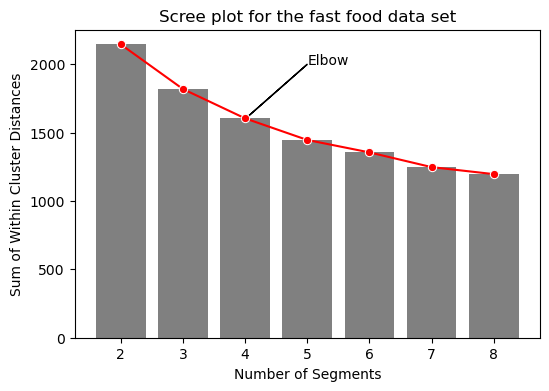

In [23]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = list(range(2, 9)), y = wcss, color = 'grey')
sns.lineplot(x = list(range(0, 7)), y = wcss, color = 'red', marker = 'o')
plt.arrow(3, 2000, -1, -400)
plt.text(3, 2000, 'Elbow')
plt.xlabel("Number of Segments")
plt.ylabel('Sum of Within Cluster Distances')
plt.title("Scree plot for the fast food data set")
plt.show()

In [24]:
kmeans = data_km28[2]

In [25]:
data_clust = data.copy()
data_clust['cluster'] = kmeans.labels_

In [26]:
data_clust.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,2
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,3
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,3
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,1
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,2


# Step 6: Profiling Segments

In [27]:
columns_segment = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap','tasty', 'expensive', 'healthy', 'disgusting', 'cluster']
data_pivot = data_clust[columns_segment].groupby('cluster').sum().T
data_pivot_percentage = data_pivot.copy()
for i in range(4):
    data_pivot_percentage[i] = data_pivot_percentage[i]/data_clust['cluster'].value_counts()[i]

In [28]:
data_pivot_mean = data_pivot_percentage.mean(axis = 1).reset_index()
data_pivot_mean.columns = ['Variable', 'Value']

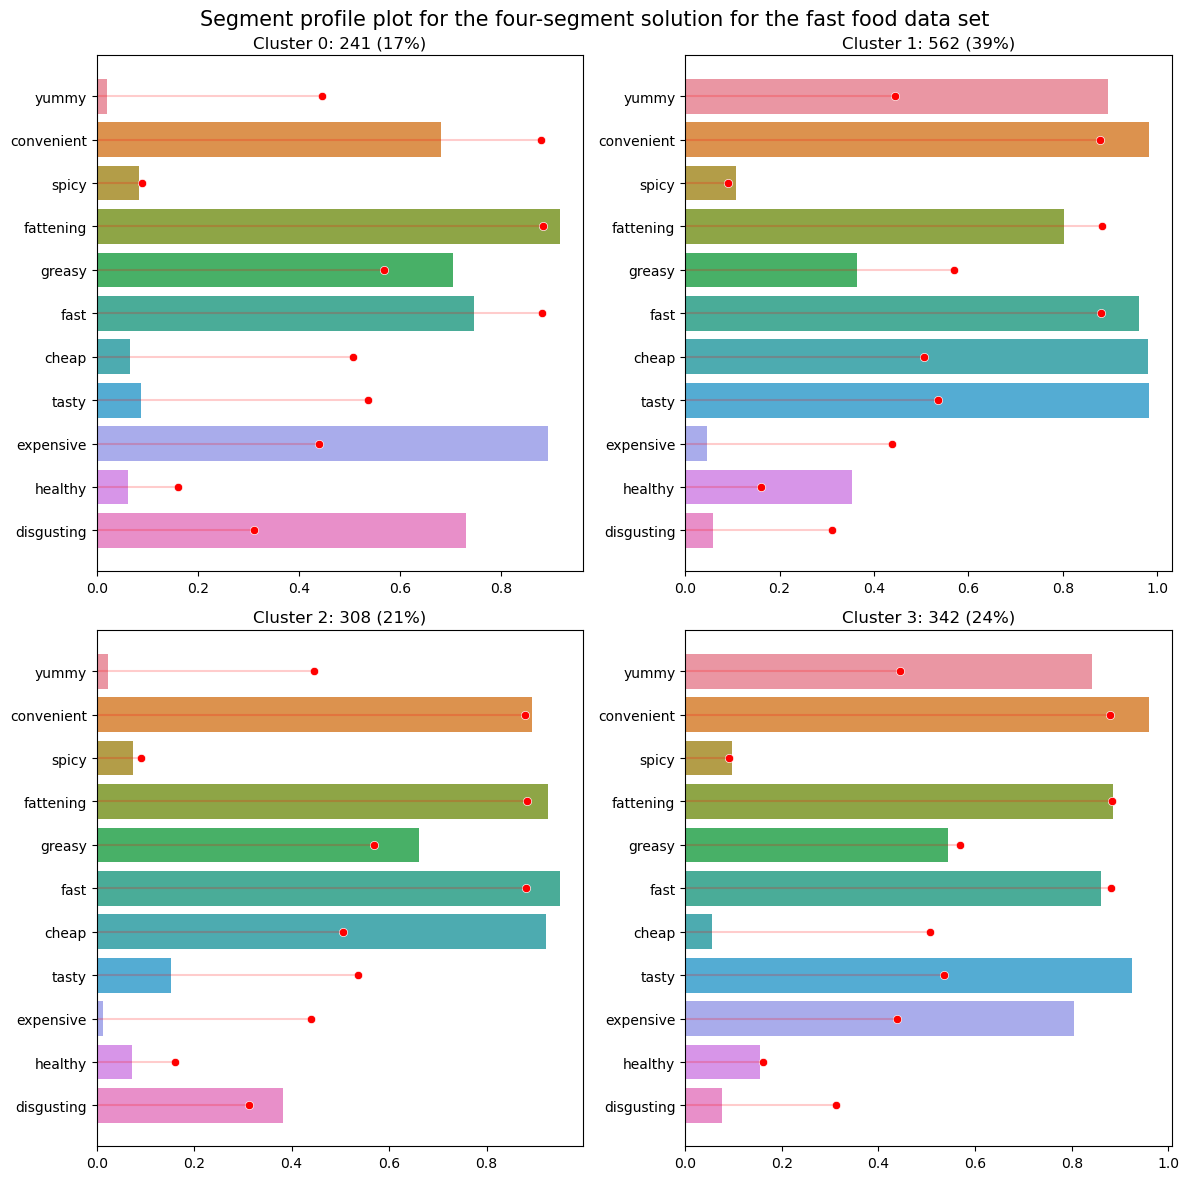

In [29]:
# Segment Profile Plot
plt.figure(figsize = (12, 12))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.barplot(data_pivot_percentage, x = i, y = data_pivot_percentage.index)
    sns.scatterplot(data_pivot_mean, x = 'Value', y = 'Variable', color = 'red')
    for index, row in data_pivot_mean.iterrows():
        plt.hlines(y=row['Variable'], xmin=0, xmax=row['Value'], colors='red', alpha = 0.2)
    plt.ylabel("")
    plt.xlabel("")
    plt.title(f"Cluster {i}: {data_clust['cluster'].value_counts()[i]} ({data_clust['cluster'].value_counts()[i]*100/len(data_clust):.0f}%)")
plt.suptitle("Segment profile plot for the four-segment solution for the fast food data set", fontsize = 15)
plt.tight_layout()
plt.show()

* Cluster 0 thinks McDonald's is expensive and disgusting
* Cluster 1 views McDonald's as yummy, cheap, tasty and healthy
* Members of cluster 2 share the view that McDonald's is cheap, but also think that the food served at McDonald's is greasy and disgusting.
* Finally, cluster 3 members of this cluster believe that McDonald's food is expensive, yummy and tasty.

In [30]:
data_pca = df_pca.copy()
data_pca['cluster'] = kmeans.labels_

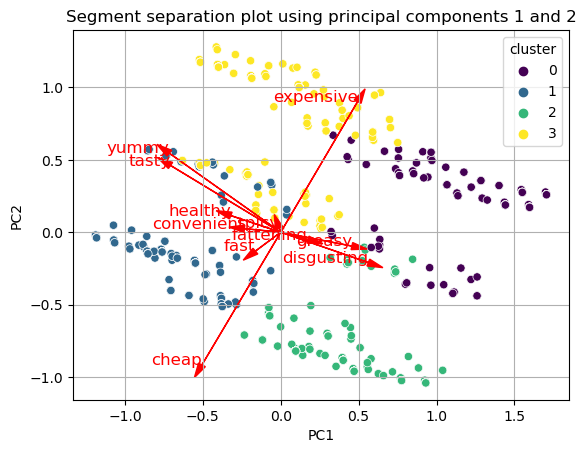

In [31]:
# Calculate centroid
index_names = factor_loadings.index

# Plot data points
sns.scatterplot(data_pca, x = 'PC1', y = 'PC2', hue = 'cluster', palette = 'viridis')

# Plot arrows from centroid to provided coordinates with index names
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 1.5, factor_loadings['PC2'][i] * 1.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text(factor_loadings['PC1'][i] * 1.5, factor_loadings['PC2'][i]* 1.5, index_names[i], fontsize=12, ha='right', color = 'red')

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Segment separation plot using principal components 1 and 2')
plt.grid(True)
plt.show()

# Step 7 Describing Segments

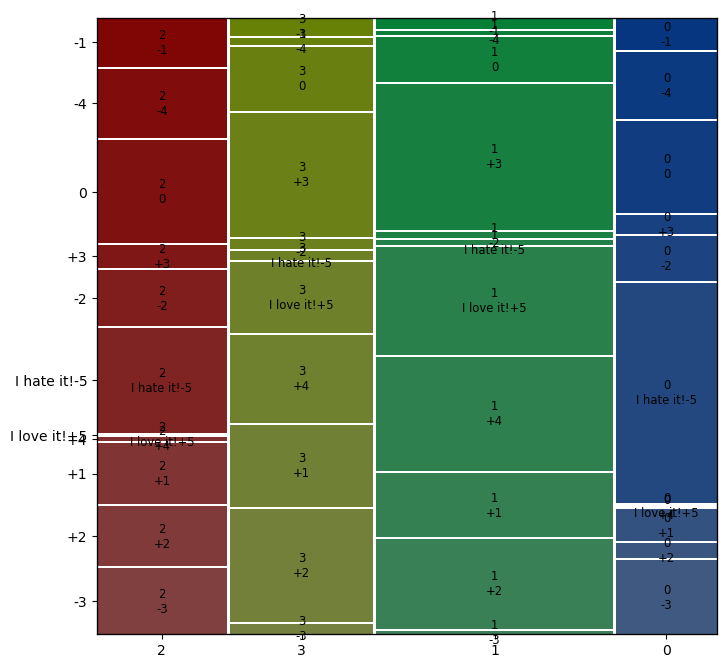

In [32]:
# Number of cluster along the x-axis and loving or hating McDonald's along the y-axis
fig = plt.figure(figsize = (8, 8))
ax = fig.gca()
mosaic(data_clust, ['cluster', 'Like'], ax= ax);

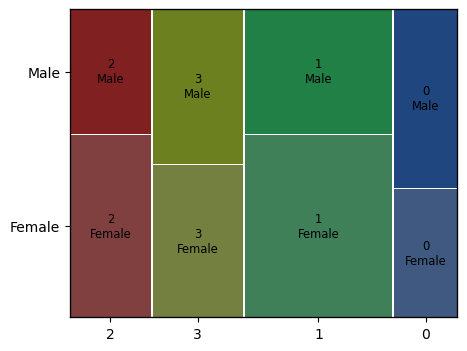

In [33]:
# Gender distribution across cluster
fig = plt.figure(figsize = (5, 4))
ax = fig.gca()
mosaic(data_clust, ['cluster', 'Gender'], ax = ax);

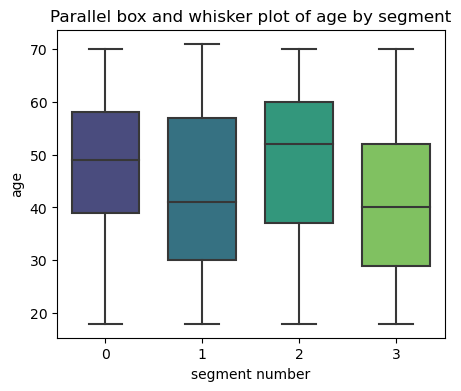

In [34]:
# Number of cluster along the x-axis and age along the y-axis
plt.figure(figsize = (5,4))
sns.boxplot(data_clust, x= 'cluster', y = 'Age', palette = 'viridis', width = 0.7)
plt.xlabel("segment number")
plt.ylabel("age")
plt.title("Parallel box and whisker plot of age by segment")
plt.show()


# Step 8 Selecting the Target Segments

In [35]:
data_segment = data_clust[data_clust.columns[-5:]]

In [36]:
mask_like = {'I hate it!-5': -5, '-4': -4, '-3': -3, '-2': -2, '-1': -1, '0': 0, '+1': 1, '+2': 2, '+3': 3, '+4': 4, 'I love it!+5': 5}
mask_gender = {'Female':0, 'Male':1}
mask_VisitFrequency = {'Never': 0, 'Once a year':1, 'Every three months':2, 'Once a month':3, 'Once a week': 4, 'More than once a week': 5}

In [37]:
data_segment['Like'] = data_segment['Like'].map(mask_like)
data_segment['Gender'] = data_segment['Gender'].map(mask_gender)
data_segment['VisitFrequency'] = data_segment['VisitFrequency'].map(mask_VisitFrequency)

In [38]:
data_segment_mean = data_segment.groupby('cluster').mean().reset_index()

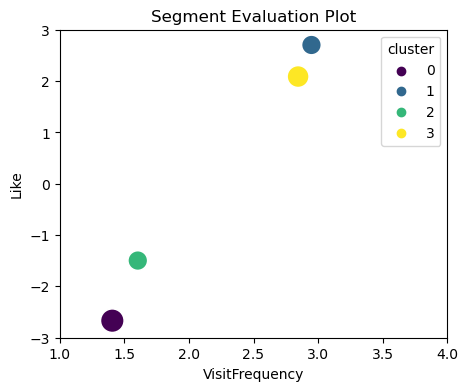

In [39]:
plt.figure(figsize = (5, 4))
size = data_segment_mean['Gender'] * 500
sns.scatterplot(data_segment_mean, x = 'VisitFrequency', y = 'Like', s=size, hue = 'cluster', palette = 'viridis')
plt.xlim(1, 4)
plt.ylim(-3, 3)
plt.title("Segment Evaluation Plot")
plt.show()

Above figure represents a simplified segment evaluation plot. Market segments 1 and 3 are located in the attractive quadrant of the segment evaluation plot. Members of these two segments like McDonald's and visit it frequently. These segments need to be retained, and their needs must be satisfied in the future. Market segment 0 is located in the least attractive position. Members of this segment hate McDonald's and rarely eat there, making them unattractive as a potential market segment. 